<a href="https://colab.research.google.com/github/Oluwatobiloba018/FinTech-Fraud-Detection-AI/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import io

# This will create a 'Choose Files' button
uploaded = files.upload()

# Once uploaded, we read it into a dataframe
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

print("\n--- Success! Data Loaded ---")
print(f"Dataset Shape: {df.shape}")

Saving creditcard.csv to creditcard.csv

--- Success! Data Loaded ---
Dataset Shape: (284807, 31)


In [3]:
# Run this once the upload is 100% complete
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
rob_scaler = RobustScaler()

# Scale 'Amount' and 'Time'
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Drop the original unscaled columns
df.drop(['Time','Amount'], axis=1, inplace=True)

# Move our new scaled columns to the front of the dataframe for better visibility
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Show the first 5 rows to confirm scaling
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
# Shuffle the data before creating the sub-sample
df = df.sample(frac=1)

# Amount of fraud classes is 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

# Combine them
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


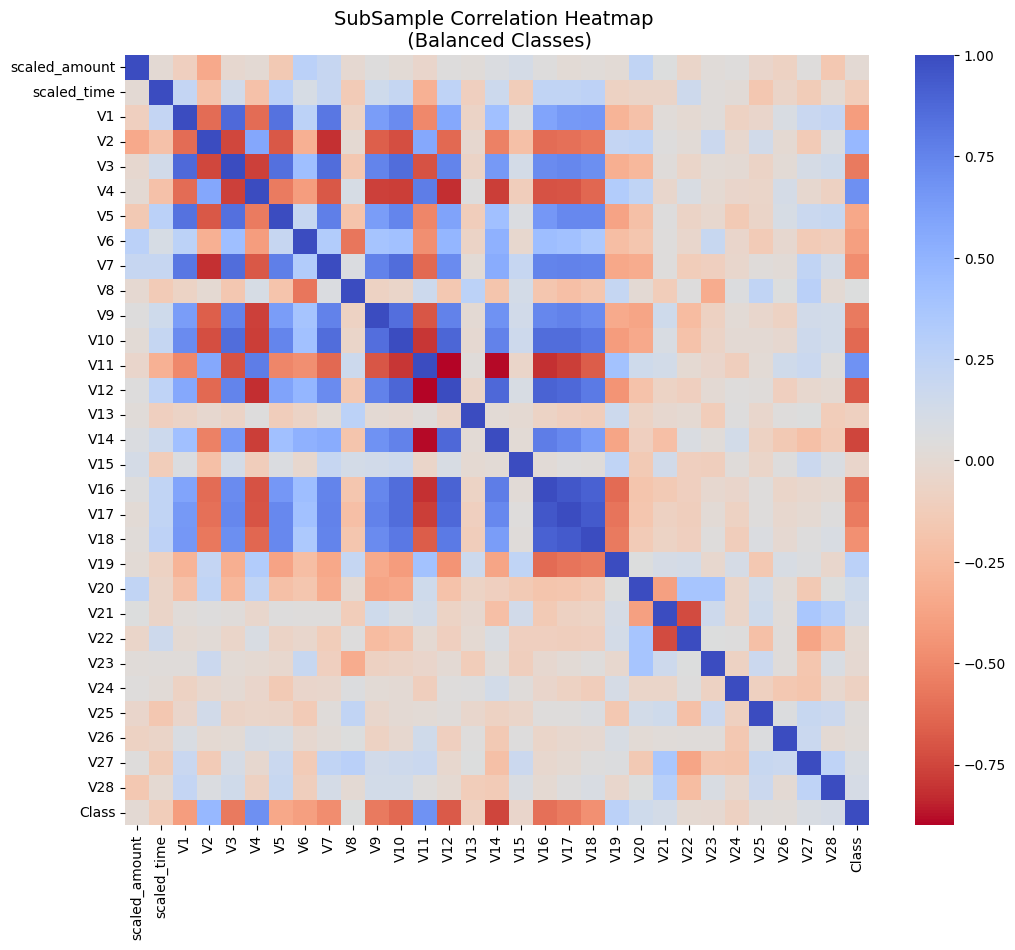

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for our balanced subsample
corr = new_df.corr()

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Heatmap \n (Balanced Classes)', fontsize=14)
plt.show()

In [7]:
# Identify V14 fraud distribution
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values

# Calculate the Interquartile Range (IQR)
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

# Calculate the cut-off
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

# Remove Outliers
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

print(f"Number of instances after outlier removal: {len(new_df)}")

Number of instances after outlier removal: 978


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Split features and labels from our balanced dataframe
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Initialize classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Cross-validate to see which performs best
for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=5)
    print(f"Classifer: {key} Has a training score of {round(training_score.mean(), 2) * 100}% accuracy score")

Classifer: LogisiticRegression Has a training score of 94.0% accuracy score
Classifer: KNearest Has a training score of 93.0% accuracy score
Classifer: Support Vector Classifier Has a training score of 93.0% accuracy score
Classifer: DecisionTreeClassifier Has a training score of 90.0% accuracy score


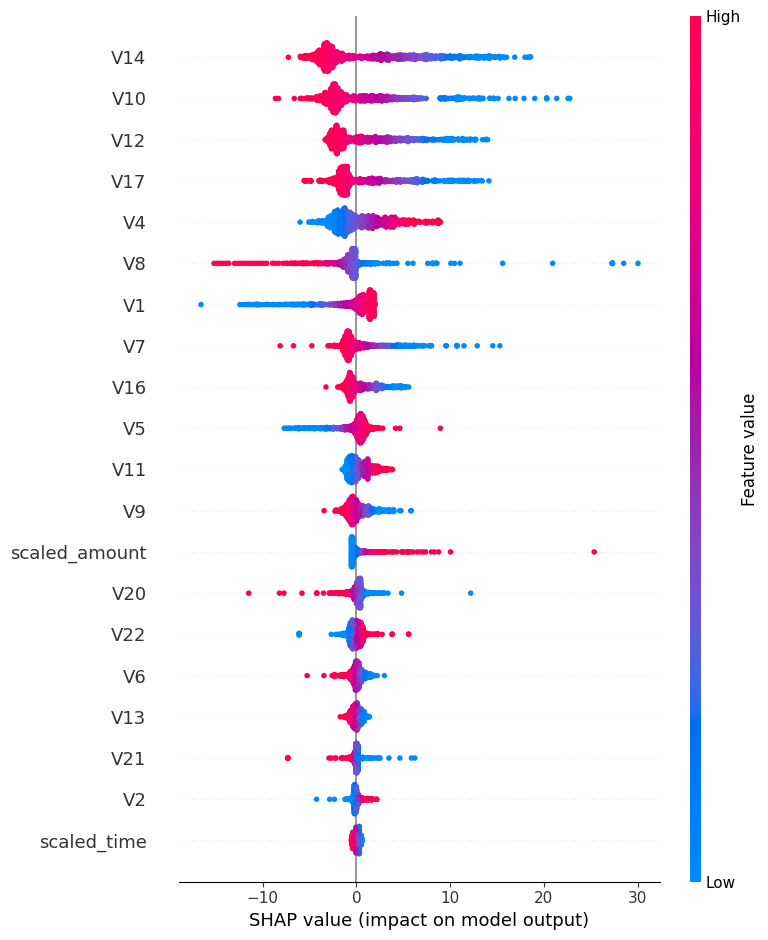

In [9]:
import shap

# We'll use Logistic Regression for quick interpretation
model = LogisticRegression().fit(X, y)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot the summary
shap.summary_plot(shap_values, X)

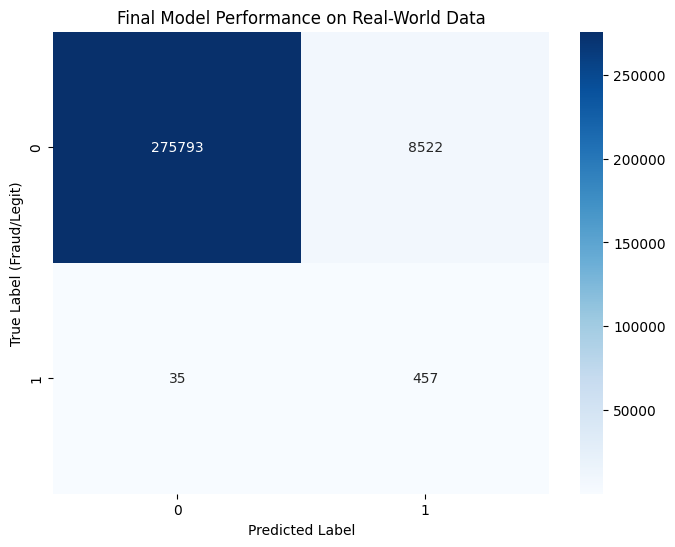


--- Final Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    284315
           1       0.05      0.93      0.10       492

    accuracy                           0.97    284807
   macro avg       0.53      0.95      0.54    284807
weighted avg       1.00      0.97      0.98    284807



In [10]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns

# 1. Prepare the FULL original data (the data we didn't use in our 50/50 sample)
# We need to scale the original df first (which we already did)
X_test_full = df.drop('Class', axis=1)
y_test_full = df['Class']

# 2. Predict using our trained model (from the balanced sample)
y_pred_full = classifiers["LogisiticRegression"].predict(X_test_full)

# 3. Create the Confusion Matrix
cm = confusion_matrix(y_test_full, y_pred_full)

# Plotting the Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Final Model Performance on Real-World Data')
plt.ylabel('True Label (Fraud/Legit)')
plt.xlabel('Predicted Label')
plt.show()

# 4. The Classification Report
print("\n--- Final Classification Report ---")
print(classification_report(y_test_full, y_pred_full))

In [12]:
import joblib

# Save the best model
joblib.dump(classifiers["LogisiticRegression"], 'fraud_model.pkl')

print("Model saved as fraud_model.pkl. You can now use this in a web app!")

Model saved as fraud_model.pkl. You can now use this in a web app!
